In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv("fcc-forum-pageviews.csv",index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [117]:
df = df[(df['value']>df['value'].quantile(0.025)) & (df['value']<df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

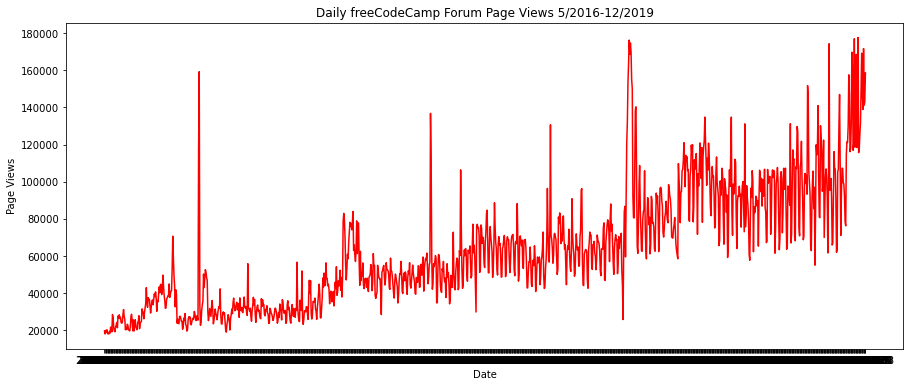

In [118]:
fig = plt.figure(figsize=(15,6))
plt.plot(df.index,df['value'],color='red')
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")


In [129]:
df['Date'] = pd.to_datetime(df.index)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
mon = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['Month'] = df['Month'].map(mon)
df.drop('Date',axis =1,inplace=True)

C:\Users\davis\AppData\Local\Temp/ipykernel_18388/285889333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df.index)
C:\Users\davis\AppData\Local\Temp/ipykernel_18388/285889333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
C:\Users\davis\AppData\Local\Temp/ipykernel_18388/285889333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [152]:
df

,value,Month,Year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016
...,...,...,...
2019-11-24,138875,November,2019
2019-11-29,171584,November,2019
2019-11-30,141161,November,2019


In [173]:
df_bar = pd.pivot_table(df,columns='Month',values='value',index='Year',aggfunc=np.mean)
df_bar

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


<Figure size 1080x432 with 0 Axes>

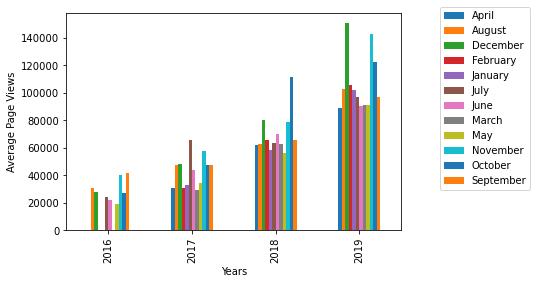

In [220]:
fig = plt.figure(figsize=(15,6))
fig = df_bar.plot(kind='bar',xlabel='Years',ylabel="Average Page Views")
fig.legend(bbox_to_anchor=(1.1,1.05))

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

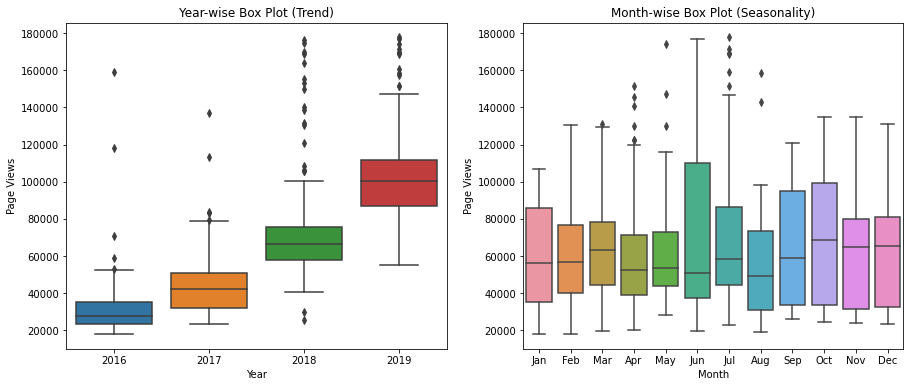

In [218]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
lab = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.boxplot(data = df, x = "Year", y= "value",ax=ax[0])
sns.boxplot(data = df, x = 'Month',y= "value",ax=ax[1])
ax[0].set_title("Year-wise Box Plot (Trend)")
ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[0].set_ylabel("Page Views")
ax[1].set_ylabel("Page Views")
ax[1].set_xticklabels(lab)